Скачайте датасет Kaggle electronic_devices_sales.

Задание 1

На основании датасета для каждого покупателя получите:

*   предпочитаемый метод оплаты;
*   общие траты;
*   количество денег, потраченных на дополнительные услуги и аксессуары.

In [13]:
import pandas as pd

df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [14]:
df = df[df["Order Status"] == "Completed"]

new_df = df.groupby("Customer ID").agg(
        Preferred_Payment=("Payment Method", lambda x: x.mode().iloc[0] if not x.mode().empty else None),
        Total_Spent=("Total Price", "sum"),
        Addon_Spent=("Add-on Total", "sum"),
    ).reset_index()
new_df = new_df.sort_values("Customer ID")

new_df.head()

,Customer ID,Preferred_Payment,Total_Spent,Addon_Spent
0,1000,Paypal,741.09,26.09
1,1002,Cash,5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,Debit Card,11779.11,75.33


Задание 2
1. На основании датасета получите доход:
    *	по каждому методу доставки,
    *	по каждому типу продукта,
    *	по дополнительным услугам за каждый месяц,
    *	по дополнительным услугам за каждый квартал.
2. Отобразите полученные данные на графике.

/tmp/ipython-input-2178878407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
/tmp/ipython-input-2178878407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Purchase Date"].dt.to_period("M")
/tmp/ipython-input-2178878407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

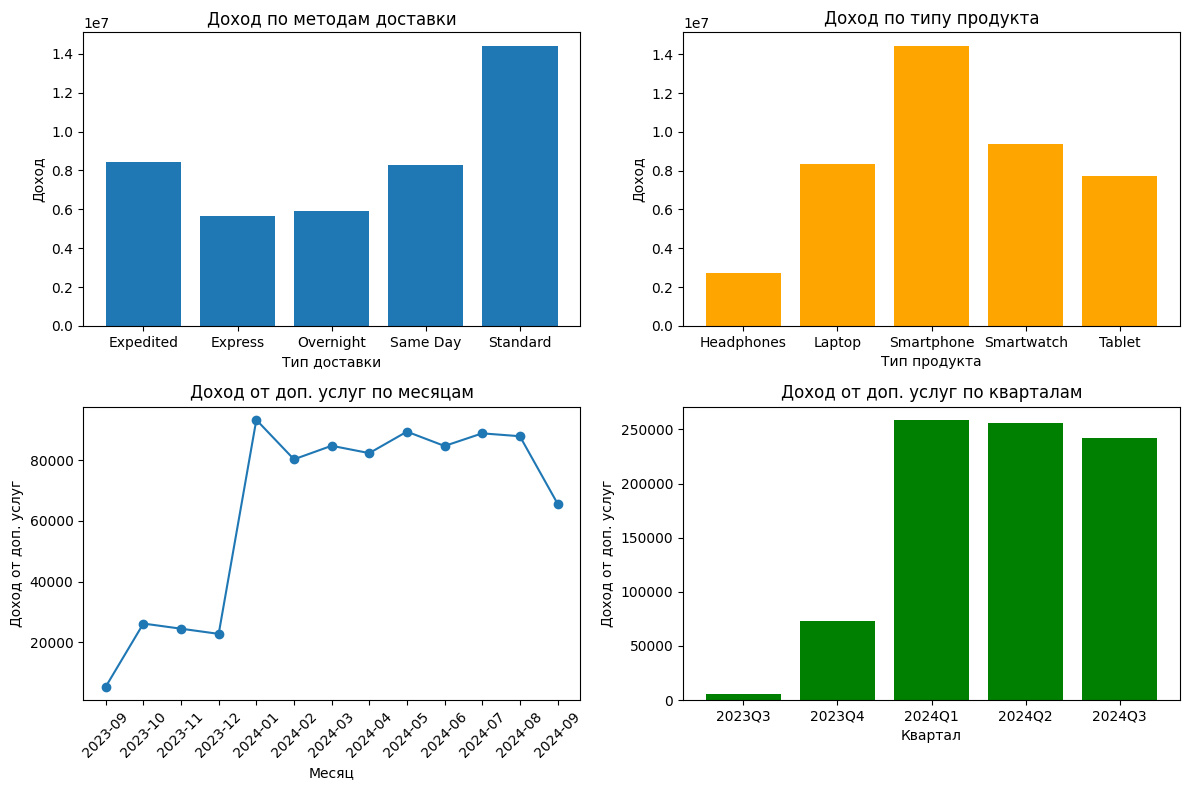

In [15]:
import matplotlib.pyplot as plt

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
income_by_shipping = df.groupby("Shipping Type")["Total Price"].sum().reset_index()
income_by_product = df.groupby("Product Type")["Total Price"].sum().reset_index()
df["Month"] = df["Purchase Date"].dt.to_period("M")
addon_by_month = df.groupby("Month")["Add-on Total"].sum().reset_index()
df["Quarter"] = df["Purchase Date"].dt.to_period("Q")
addon_by_quarter = df.groupby("Quarter")["Add-on Total"].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(income_by_shipping["Shipping Type"], income_by_shipping["Total Price"])
plt.title("Доход по методам доставки")
plt.xlabel("Тип доставки")
plt.ylabel("Доход")

plt.subplot(2, 2, 2)
plt.bar(income_by_product["Product Type"], income_by_product["Total Price"], color="orange")
plt.title("Доход по типу продукта")
plt.xlabel("Тип продукта")
plt.ylabel("Доход")

plt.subplot(2, 2, 3)
plt.plot(addon_by_month["Month"].astype(str), addon_by_month["Add-on Total"], marker="o")
plt.title("Доход от доп. услуг по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Доход от доп. услуг")
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(addon_by_quarter["Quarter"].astype(str), addon_by_quarter["Add-on Total"], color="green")
plt.title("Доход от доп. услуг по кварталам")
plt.xlabel("Квартал")
plt.ylabel("Доход от доп. услуг")

plt.tight_layout()
plt.show()